# Вивчення фізичного маятника 
### Лабораторна робота №4

Виконав студент групи ФІ-81 *Шкаліков Олег Володимирович*  
Перевірив *Димитрієва Наталія Федорівна*

**Мета**: Визначення прискорення вільного падіння за допомогою оборотного маятника  
**Завдання**: 
- Виміряти період $T$, вимірявши час 5-10 коливань
- Виміряти довжину нитки математичного маятника, період коливань якого співпадає з фізичним
- Знайти прискорення вільного падіння $g$

## Теоретична частина

Фізичним маятником називають будь-яке тверде тіло, яке може вільно обертатись навколо горизонтальної осі під дією сили тяжіння. Рух будь-якого маятника описується рівнянням(1)
$$M = J{\partial^2\phi \over \partial t^2}$$
, де $J$ - момент інерції маятника, $\phi$ - кут відхилення центра мас маятника від положення рівноваги, $M$ - момент сил, що діють на маятник, $t$ - час. 
![](PhysicsM.png)
Наприклад, для однорідного стержня довжиною $l$ за теоремою Гюйгенса-Штейнера момент інерції дорівнює:
$$J = ms^2 + {ml^2\over12}$$
, де $m$ - масса маятника, $s$ - відстань між центром мас та віссю обертання.  
Момент сили тяжіння, що діє на маятник можна розрахувати за формулою
$$M = -smg\sin\phi$$
Якщо кут $\phi$ - малий, тоді $\sin \phi \approx \phi$, отже 
$$M \approx -smg \phi$$
Добре налагоджений маятник може зробити кілька сот коливань коливань без помітного згасання, тому моментом сили тертя в першому наближенні можна знехтувати. Підставляючи вираз для $M$ в (1), отримаємо рівняння для коливань(2):
$$\phi'' + \omega^2\phi = 0$$
з частотою(3)
$$\omega = \sqrt{mgs\over J}$$
Рівняння (2) описує гармонічні коливання, що відбуваєтся за законом $\phi(t) = A \sin(\omega t + \theta)$. Амплітуда коливань $A$ та їх фаза $\theta$ залежать від способу збудження коливань, тобто від початкових умов. Власна частота коливань $\omega$ згідно з (3), визначається тільки параметрами маятника $J$ та $s$.  
Період коливань фізичного маятника $T = {2\pi \over \omega}$, як і його частота, не залежить від фази та амплітуди коливань і дорівнює(4)
$$T = 2\pi \sqrt{J\over mgs}$$
Рух маятника описуэться рівнянням гармонічних коливань(2) лише за умови малих коливань($\sin \phi \approx \phi$). Якщо ввсети позначення $L={J \over ms}$, то формула буде мати такий вигляд, як і формула для математичного маятника(5)
$$T = 2\pi\sqrt{L \over g}$$

## Практична частина

Для обрахунку, перетворення та візуалізації результатів експерименту будемо використовувати бібліотеки Pandas, Scipy, Numpy та Matplotlib

In [2]:
%matplotlib inline
import pandas as pd
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt

Вивантажимо дані експерименту, збережені у csv файлі, та представимо їх у вигляді таблиці

In [3]:
df = pd.read_csv("Lab1.csv")
df

,N,t(с),s(см),L(см)
0,11,11.169,17.0,25.3
1,11,11.177,17.0,25.3
2,14,14.220,17.0,25.3
3,11,11.173,17.0,25.3
4,8,8.360,18.0,24.7
5,11,11.489,18.0,24.7
6,11,11.477,18.0,24.7
7,8,9.039,22.0,31.0
8,8,9.046,22.0,31.0
9,8,9.041,22.0,31.0


, де $N$ - кількість коливань, $t(c)$ - час, $s(cм)$ - довжина між центром мас та віссю коливань, $L(см)$ - довжина нитки математичного маятника, який коливається з періодом рівним періоду фізичного маятника.
Обрахуємо середні значення колонок для рівних $L$ та приведемо дані у одиниці системи СІ та перейменуємо колонки для більш зручної роботи з ними

In [4]:
df.columns = ['N','t','s','L']
df = df.groupby(["L"], as_index = False).mean()
df['T'] = df.apply(lambda row: row['t']/row['N'], axis=1)
df['s'] = df.apply(lambda row: row['s']/100, axis=1)
df['L'] = df.apply(lambda row: row['L']/100, axis=1)
df

,L,N,t,s,T
0,0.247,10.00,10.442000,0.180,1.044200
1,0.253,11.75,11.934750,0.170,1.015723
2,0.310,8.00,9.042000,0.220,1.130250
3,0.330,8.00,9.649667,0.215,1.206208


Прискорення вільного падіння ми визначимо за допомогою фізичного та математичного маятників, використовуючи наступні співвідношення. Для визначення g за допомогою математичного маятника: $$g_{math} = {4\pi^2l \over T^2}$$  
,де $l$ - довжина нитки  
Для визначення g за допомогою фізичного маятника: $$g_{physics} = {4\pi^2L \over T^2}$$  
,де $L = {J\over ms}$ - приведена довжина фізичного маятника($J$ - момент інерції, $m$ - масса, $s$ - довжина від центру мас до осі обертання
Якщо період коливань фізичного та математичного маятника дорівнюють один одному, то $L = l$.  
Отже виміряємо $l$, $N$ - кількість коливань, $t$ - час, за який ці коливання було здійсненно та за допомогою методу найменших квадратів апроксимуємо лінійною функцією $L(T^2) = kT^2 + b$ залежність $L$ від $T^2$: $$L = l = {t^2\over 4\pi^2N^2}g = {T^2\over 4\pi^2}g$$
Таким чином отриманий коефіцієнт $k$ дорівнює: $$k = {g \over 4\pi^2}$$
Отже, виразимо $g$ через $k$: $$g = {4k\pi^2}$$

In [5]:
x = df['T'].apply(lambda x: x**2)
y = df['L']
basis = np.vstack((x,np.ones(4))).T
koef = scipy.linalg.lstsq(basis, y)[0]
print("g = " + str(koef[0]*4*np.pi**2))

g = 8.195768740997073


Отже коефіцієнт вільного падіння $g$, отриманий за результатами експериментів з фізичним маятником: $8.2{м \over с^2}$.  
Візуалізуємо результат, побудувавши теоретичну залежність апроксимовану функцію на відрізку $T^2 = [1, 1.5]$

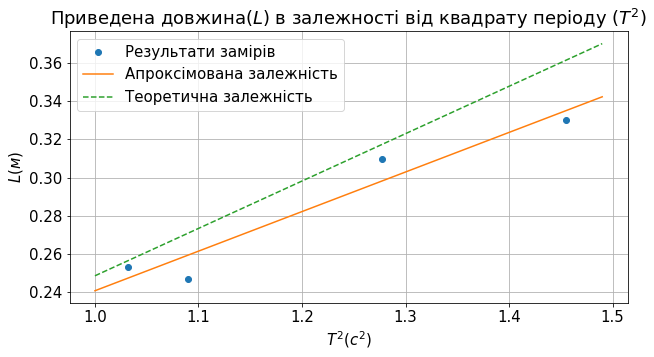

In [9]:
xnew = np.arange(1, 1.5, 0.01)
yideal = 9.81 / (4*np.pi**2) * xnew
ynew = koef[0] * xnew + koef[1]
plt.figure(figsize = (10,5))
plt.title("Приведена довжина($L$) в залежності від квадрату періоду $(T^2)$")
plt.xlabel("$T^2 (с^2)$")
plt.rc('font', size=15)
plt.ylabel("$L (м)$")
plt.grid();

plt.plot(x, y, 'o', label = "Результати замірів")
plt.plot(xnew, ynew, '-', label = "Апроксімована залежність")
plt.plot(xnew, yideal, '--', label = "Теоретична залежність");
plt.legend(loc="best");

Для перевірки отриманих результатів, порівняємо значення прискорення вільного падіння($g$) з експерименту та довідника.
Для обчислення похибки використаємо систематичну абсолютну похибку, яка отримана з наступних міркувань:
$$g = (4\pi^2{L\over T^2})$$
Пролагорифмуємо цей вираз та отримаємо:
$$\ln g = \ln(4\pi^2{L\over T^2}) = \ln(4\pi^2) + \ln L + \ln N^2 - \ln t^2$$
Обраховуємо дифференціал:
$$\partial \ln g = \partial \ln (4 * \pi^2) + \partial \ln L + \partial \ln N^2 - \partial \ln t^2 = \partial \ln L + \partial \ln N^2 + \partial \ln t^2$$  
$${\partial g \over g} = {\partial L \over L} + {2\partial N \over N} + {2\partial t \over t}$$  
Замінюючи дифференціали на значення похибки вимірів($\Delta t = 0.001(с), \Delta L = 0.01(м), \Delta N = 0$) та значення вимірів на середнє, маємо:
$$\Delta g = g({\Delta L \over \overline L} + {2\Delta t \over \overline t})$$
Та відносне відхилення $\delta$. Для $g$ - це: $$\delta = {|g_{експеримент} - g_{теоретичне}|\over g_{теоретичне}}$$

In [7]:
def delta(time, lenght, deltaTime, deltaLenght):
    return koef[0] * 4*np.pi**2 * (2/time.mean()*deltaTime + 1/lenght.mean()*deltaLenght)
#def meanSquaredDelta(time, lenght, deltaTime, deltaLenght):
#    return koef[0] * 4 * np.pi**2 * np.sqrt((2/time.mean()*deltaTime)**2 + (1/lenght.mean()*deltaLenght)**2);

In [8]:
delta = delta(df['t'],df['L'], 0.001, 0.01)
#msDelta = meanSquaredDelta(df['t'], df['L'], 0.001, 0.01)
relError = abs(koef[0] * 4*np.pi**2 - 9.81) / 9.81
print("relError = " + str(relError))
print("delta = " + str(delta))
#print("msDelta = " + str(msDelta))

relError = 0.16454956768633308
delta = 0.2891673433105003


Отримаємо: 
- абсолютна похибка $\Delta g \approx 0.3$
- відносна похибка отриманого та теоретичного значення $g$: $\delta \approx 0.16$

## Висновок


Отже, за допомогою синхронізованих(мають однаковий період коливань) математичного і фізичного маятника ми отримали значення прискорення вільного падіння $g = 8.2 \pm 0.3 {м \over с^2}$. Воно істотно(на $\approx 16\%$) відрізняється від теоретичного, що можливо пояснити різницею у періодах математичного та фізичного маятників, що спричинена неточністю вимірів та людським фактором.